In [3]:
%matplotlib inline

In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import random
from sklearn.cluster import MeanShift

In [59]:
data=pd.read_csv('2020-XTern-DS.csv')

In [118]:
X=[]
for i in range(len(data)):
    X.append([data.iloc[i,1],data.iloc[i,2]])
cluster = MeanShift(bandwidth=0.2).fit(X)
for i in range(len(cluster.labels_)):
    X[i].append(cluster.labels_[i])

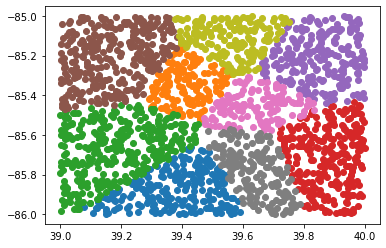

In [120]:
'''
Using a mean shift algorithm with a bandwidth of 0.2 to cluster the data, I found that there are 9 different clusters 
given that we don't take into account any other information other than location of the restaurants. These pick up 
spots are at the center of each cluster depicted by colors in the plot below.
'''
x=[]
y=[]
for j in range(9):
    x=[]
    y=[]
    for i in range(len(X)):
        if X[i][2] == j:
            x.append(X[i][0])
            y.append(X[i][1])
    plt.scatter(x,y)

In [ ]:
'''
I used a mean shift algorithm above taking into account only restaurant locations, but now I will add in factors of 
cost and ratings. I will 
'''
X=[]
for i in range(len(data)):
    if (data.iloc[i,6]!='NEW' and data.iloc[i,6]!='-' and data.iloc[i,8]!='-'):
        if (float(data.iloc[i,6])>=4 and float(data.iloc[i,8])>1000):
            X.append([data.iloc[i,1],data.iloc[i,2]])
cluster = MeanShift(bandwidth=0.2).fit(X)
for i in range(len(cluster.labels_)):
    X[i].append(cluster.labels_[i])
x=[]
y=[]
for j in range(9):
    x=[]
    y=[]
    for i in range(len(X)):
        if X[i][2] == j:
            x.append(X[i][0])
            y.append(X[i][1])
    plt.scatter(x,y)

['ID_2882', 'ID_5221', 'ID_3777', 'ID_2970', 'ID_1156', 'ID_6891', 'ID_6406', 'ID_2141', 'ID_5262', 'ID_8148', 'ID_4751', 'ID_425', 'ID_3069', 'ID_4494', 'ID_2139', 'ID_7299', 'ID_6857', 'ID_3429', 'ID_1521', 'ID_1443', 'ID_156', 'ID_5570', 'ID_294', 'ID_7768', 'ID_2216', 'ID_3309', 'ID_3087', 'ID_207', 'ID_5095', 'ID_8233', 'ID_6205', 'ID_888', 'ID_164', 'ID_4849', 'ID_5321', 'ID_2376', 'ID_3147', 'ID_6452', 'ID_5076', 'ID_3468', 'ID_6224', 'ID_1124', 'ID_6637', 'ID_3712', 'ID_3814', 'ID_7226', 'ID_1532', 'ID_3539', 'ID_2677', 'ID_1203', 'ID_7260', 'ID_1996', 'ID_7796', 'ID_5223', 'ID_2093', 'ID_5969', 'ID_7677', 'ID_4484', 'ID_669', 'ID_4609', 'ID_5401', 'ID_1215', 'ID_553', 'ID_622', 'ID_6951', 'ID_5237', 'ID_1005', 'ID_5181', 'ID_6145', 'ID_8614', 'ID_4468', 'ID_1171', 'ID_8129', 'ID_6908', 'ID_3332', 'ID_7412', 'ID_5921', 'ID_1460', 'ID_2002', 'ID_6441', 'ID_2164', 'ID_3499', 'ID_3779', 'ID_3683', 'ID_2802', 'ID_188', 'ID_7647', 'ID_6436', 'ID_7397', 'ID_5574', 'ID_4635', 'ID_6659

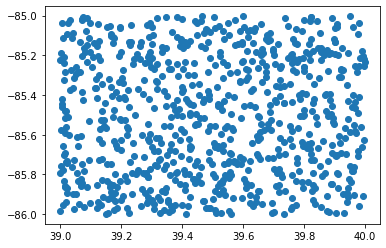

In [131]:
'''
Pick up location analysis for cheap and quick restaurants
'''
cheapQuick=[]
x=[]
y=[]
for i in range(len(data)):
    if (data.iloc[i,9]=='30 minutes' and float(data.iloc[i,4][1:])<=15):
        x.append(data.iloc[i,1])
        y.append(data.iloc[i,2])
        cheapQuick.append(data.iloc[i,0])
print(cheapQuick)
plt.scatter(x,y)

[('ID_745', '$65.00'), ('ID_1696', '$80.00'), ('ID_7753', '$75.00'), ('ID_2885', '$45.00'), ('ID_1316', '$60.00'), ('ID_4202', '$20.00'), ('ID_2041', '$65.00'), ('ID_4878', '$40.00'), ('ID_7158', '$20.00'), ('ID_4202', '$20.00'), ('ID_1947', '$55.00'), ('ID_7678', '$50.00'), ('ID_1140', '$20.00'), ('ID_8087', '$60.00'), ('ID_6915', '$65.00'), ('ID_847', '$30.00'), ('ID_6631', '$30.00'), ('ID_2032', '$25.00'), ('ID_2421', '$80.00'), ('ID_7720', '$55.00'), ('ID_5945', '$45.00'), ('ID_1064', '$80.00'), ('ID_2491', '$45.00'), ('ID_1666', '$50.00'), ('ID_2051', '$30.00'), ('ID_3192', '$95.00'), ('ID_5532', '$35.00'), ('ID_13', '$65.00'), ('ID_2601', '$15.00'), ('ID_4606', '$15.00')]


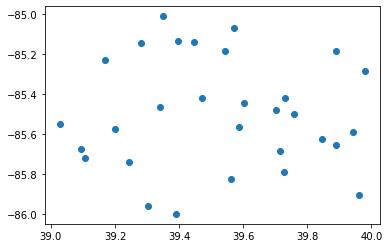

In [126]:
'''
Best and Most Popular Restaurants:
This is a list of all the most popular restaurants. I decided popularity based on a quota of 1000 reviews and 
at least a 4 star rating. This is because I think 4 stars is a respectable rating for a restaurant, but I don't 
want to include restaurants with very high ratings and a low number of reviews, because the rating could be very
inaccurate due to the low sample size. From the data I collected, I actually realized that there was a very high
correlation between a high average cost and a high rating. I exclude new restaurants and restaurants without any 
rating because since very few people have visted them, it is hard to draw a conclusion about whether they will be 
popular or trendy.
'''
best = []
xbest=[]
ybest=[]
for i in range(len(data)):
    if (data.iloc[i,6]!='NEW' and data.iloc[i,6]!='-' and data.iloc[i,8]!='-'):
        if (float(data.iloc[i,6])>=4 and float(data.iloc[i,8])>1000):
            best.append((data.iloc[i,0], data.iloc[i,4]))
            xbest.append(data.iloc[i,1])
            ybest.append(data.iloc[i,2])
print(best)
plt.scatter(xbest,ybest)

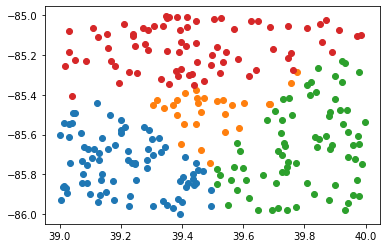

In [130]:
'''
I used a mean shift algorithm above taking into account only restaurant locations, but now I will add do the same with
only highly rated/trendy restaurants. Compared to the list above, I reduced the criteria to only 100 reviews, so that 
I would have more data points which would hopefully lead to better clusters. Again the mean shift algorithm, resulted 
in 4 cluster (upper middle, lower left, lower right, and center). If we were only ordering from popular restaurants, 
the best pickup locations would be at the center of each of these colored clusters.
'''
X=[]
for i in range(len(data)):
    if (data.iloc[i,6]!='NEW' and data.iloc[i,6]!='-' and data.iloc[i,8]!='-'):
        if (float(data.iloc[i,6])>=4 and float(data.iloc[i,8])>100):
            X.append([data.iloc[i,1],data.iloc[i,2]])
cluster = MeanShift(bandwidth=0.3).fit(X)
for i in range(len(cluster.labels_)):
    X[i].append(cluster.labels_[i])
x=[]
y=[]
for j in range(9):
    x=[]
    y=[]
    for i in range(len(X)):
        if X[i][2] == j:
            x.append(X[i][0])
            y.append(X[i][1])
    plt.scatter(x,y)

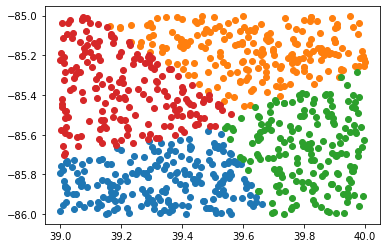

In [140]:
'''
Finally, I am going to again use the clustering algorithm to find the best pickup locations, but this time, I am only 
going to examine the cheap and quick restaurant locations. This clustering does not take into account the ratings of 
these restaurants. The mean shift algorithm returned 4 clusters, one in each quadrant of the plots.
'''
X=[]
for i in range(len(data)):
    if (data.iloc[i,9]=='30 minutes' and float(data.iloc[i,4][1:])<=15):
        X.append([data.iloc[i,1],data.iloc[i,2]])
cluster = MeanShift(bandwidth=0.25).fit(X)
for i in range(len(cluster.labels_)):
    X[i].append(cluster.labels_[i])
x=[]
y=[]
for j in range(9):
    x=[]
    y=[]
    for i in range(len(X)):
        if X[i][2] == j:
            x.append(X[i][0])
            y.append(X[i][1])
    plt.scatter(x,y)

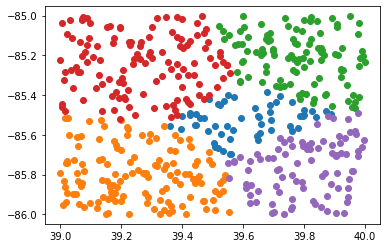

In [139]:
'''
Curiously, when running the same algorithms on cheap and quick restaurants, but without including new or unrated 
restaurants, the number of clusters increases. If we were to not try newer restaurants due to fearing that 
the reviews would not be accurate due to the low sample size, we would have 5 optimal pick up points, and there is a 
new cluster created at the center.
'''
X=[]
for i in range(len(data)):
    if (data.iloc[i,6]!='NEW' and data.iloc[i,6]!='-' and data.iloc[i,8]!='-'):
        if (data.iloc[i,9]=='30 minutes' and float(data.iloc[i,4][1:])<=15):
            X.append([data.iloc[i,1],data.iloc[i,2]])
cluster = MeanShift(bandwidth=0.25).fit(X)
for i in range(len(cluster.labels_)):
    X[i].append(cluster.labels_[i])
x=[]
y=[]
for j in range(9):
    x=[]
    y=[]
    for i in range(len(X)):
        if X[i][2] == j:
            x.append(X[i][0])
            y.append(X[i][1])
    plt.scatter(x,y)